In [12]:
### Using hight-API from tensorflow
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv3D, MaxPool2D, AveragePooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [2]:
#datasets
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
tf.keras.datasets.fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_name = ['T-shirt/top', 'Trouser/pants', 'Pullover shirt','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
len(train_labels)

60000

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
np.count_nonzero(train_images == 233)

136571

In [15]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [16]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [17]:
train_images.shape

(60000, 28, 28, 1)

In [18]:
plt.figure(figsize = (10, 10))
for i in (25):
    plt.subplot(5, 5+i)
    


TypeError: 'int' object is not iterable

In [19]:
model = Sequential()

In [20]:
model.add(Flatten(input_shape = (28, 28)))

In [21]:
model.add(Dense(128, activation = 'relu'))

In [22]:
model.add(Dense(10))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
H = model.fit(train_images, train_labels,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 3.2139 - accuracy: 0.6889
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7069 - accuracy: 0.7259
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6036 - accuracy: 0.7840
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5366 - accuracy: 0.8149
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5270 - accuracy: 0.8181
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5078 - accuracy: 0.8237
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4890 - accuracy: 0.8298
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4794 - accuracy: 0.8339
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4862 - accuracy: 0.8329
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.483

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose= 2)
print(test_acc)

313/313 - 0s - loss: 0.5610 - accuracy: 0.8157
0.8156999945640564


In [27]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(test_images)

In [29]:
predictions[test_images[8]]

array([[[[5.9022021e-14, 2.4813258e-09, 6.8226642e-36, ...,
          1.0928404e-01, 7.5965856e-13, 8.7947506e-01]],

        [[5.9022021e-14, 2.4813258e-09, 6.8226642e-36, ...,
          1.0928404e-01, 7.5965856e-13, 8.7947506e-01]],

        [[5.9022021e-14, 2.4813258e-09, 6.8226642e-36, ...,
          1.0928404e-01, 7.5965856e-13, 8.7947506e-01]],

        ...,

        [[5.9022021e-14, 2.4813258e-09, 6.8226642e-36, ...,
          1.0928404e-01, 7.5965856e-13, 8.7947506e-01]],

        [[5.9022021e-14, 2.4813258e-09, 6.8226642e-36, ...,
          1.0928404e-01, 7.5965856e-13, 8.7947506e-01]],

        [[5.9022021e-14, 2.4813258e-09, 6.8226642e-36, ...,
          1.0928404e-01, 7.5965856e-13, 8.7947506e-01]]],


       [[[5.9022021e-14, 2.4813258e-09, 6.8226642e-36, ...,
          1.0928404e-01, 7.5965856e-13, 8.7947506e-01]],

        [[5.9022021e-14, 2.4813258e-09, 6.8226642e-36, ...,
          1.0928404e-01, 7.5965856e-13, 8.7947506e-01]],

        [[5.9022021e-14, 2.4813258e-09, 

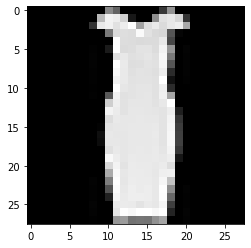

 Predict is 3


In [39]:
plt.imshow(test_images[666].reshape(28, 28), cmap='gray')
plt.show()
y_predict = model.predict(test_images[666].reshape(1, 28, 28, 1))
print(' Predict is', np.argmax(y_predict))

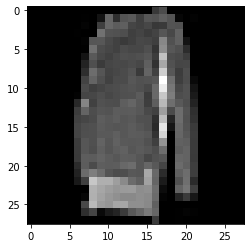

In [11]:
test_images[66]
plt.imshow(test_images[66],cmap= 'gray')